### Question 3.3

In [42]:
# Load libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from scipy.stats import levene
from stemgraphic import stem_graphic

In [43]:
# Loading the datasets
CH03PR03 = pd.read_excel("C:\\Users\\kwame\\Downloads\\3.3.xlsx")

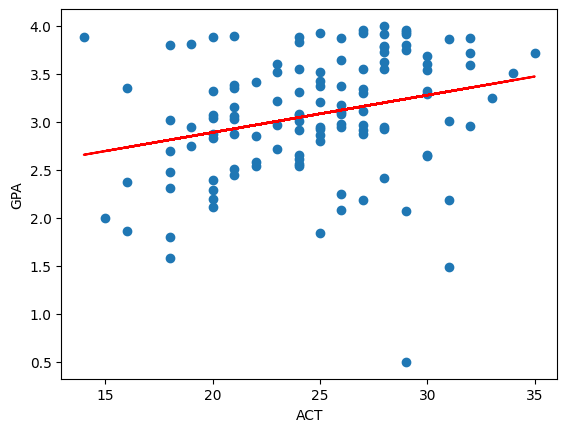

In [44]:
# Create a scatterplot
plt.scatter(CH03PR03['ACT'], CH03PR03['GPA'])
plt.xlabel('ACT')
plt.ylabel('GPA')

# Fit the linear regression model
X = CH03PR03[['ACT']]
y = CH03PR03['GPA']

model = LinearRegression()
model.fit(X, y)

# Add the regression line to the plot
plt.plot(X, model.predict(X), color='red')
plt.show()

#### a. The boxplot of ACT scores shows no obvious outliers and a symmetric distribution.

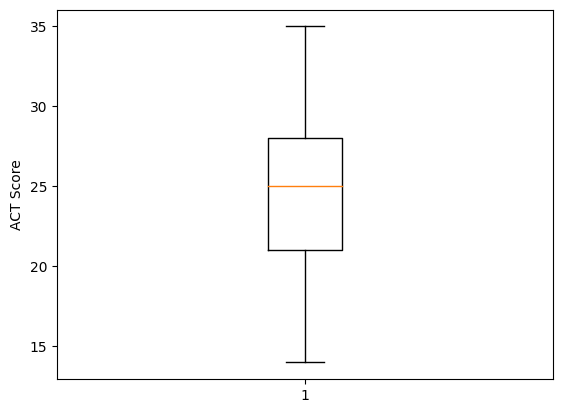

In [45]:
# Create a boxplot
plt.boxplot(CH03PR03['ACT'])
plt.ylabel('ACT Score')
plt.show()

#### b. A dotplot (technically I've produced a stem-and-leaf plot, but it conveys the same info) shows the distribution of the residuals to be slightly left skewed with a few large observations. Because the size of residuals reflect the scale of measurement, it's hard to understand whether these large observations are really unusual.

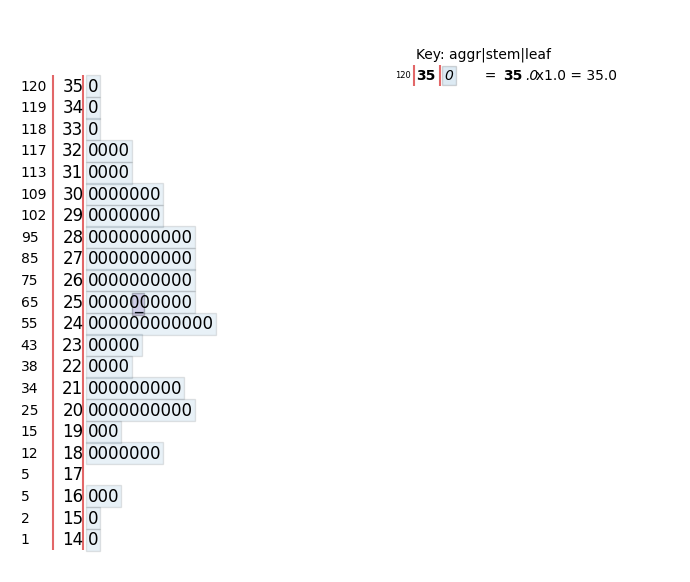

In [46]:
stem_graphic(CH03PR03['ACT'])
plt.show()

#### c. Using the 'lowess' function to visualize any non-random patterns in the residuals.  Here, the 'lowess' fit is plotted in blue. Because the 'lowess' fit to this data is very similar to a horizontal line at \(e = 0\), this indicates the residuals are randomly scattered above and below 0. 

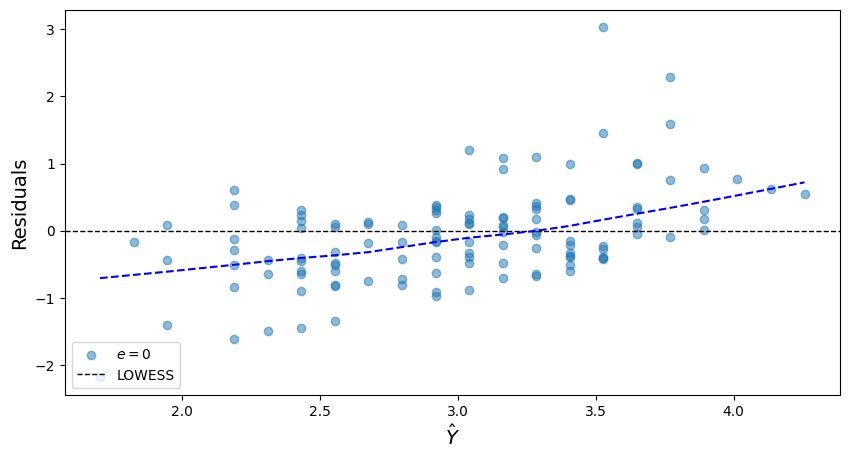

In [47]:
# Create your model
model = sm.OLS(y, X)

# Fit the model to your data
results = model.fit()

# Access the fitted values
fitted = results.fittedvalues

residuals= fitted - y

# Create a scatter plot of residuals vs. fitted values
plt.figure(figsize=(10, 5))
plt.scatter(fitted, residuals, alpha=0.5)
plt.xlabel(r'$\hat{Y}$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)

# Add a horizontal line at y=0
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Add a LOWESS (Locally Weighted Scatterplot Smoothing) line
lowess = sm.nonparametric.lowess(residuals, fitted)
plt.plot(lowess[:, 0], lowess[:, 1], color='blue', linestyle='--', label='LOWESS')

# Add a legend
plt.legend(['$e=0$', 'LOWESS'], loc='lower left')

plt.show()

#### d. We can see here that though the data do follow the line they pull away at the ends.  This feature indicates issues in the tails of the distribution.  Specifically, the lower tail is too thin (drops below, so the theoretical quantiles are bigger than expected) and the upper tail is to heavy (drops below, so the theoretical quantiles are bigger than expected), pointing toward some left-skewness in the distribution.

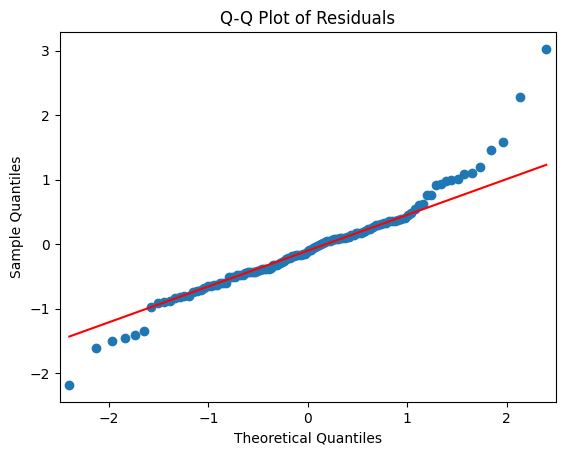

In [48]:
# Create a Q-Q plot of the residuals
sm.qqplot(residuals, line='q')  # 'q' indicates that a line should be drawn
plt.title("Q-Q Plot of Residuals")
plt.show()

#### e. To conduct the Brown-Forsythe test of homogeneity of error variances, you have to create a new grouping variable according to the book's requested cutoff:  \(X < 26\) versus \(X \geq 26\).  This test will compare the variance of the residuals between the two groups.  Small values of \(p\) reflect larger differences in group variances. Here, there is no evidence that the variances are different.

GRP
<26     0.121933
>=26    0.074015
Name: E, dtype: float64
Brown-Forsythe test statistic: 4.653422184667396
P-value: 0.0330193787987374


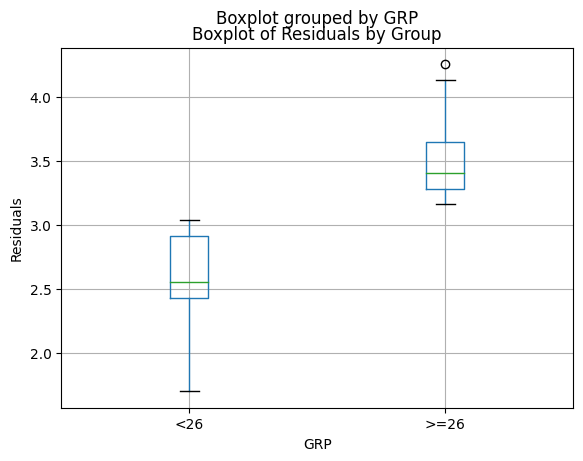

In [49]:
# Create a binary grouping variable 'GRP' based on 'ACT' scores
CH03PR03['GRP'] = np.where(CH03PR03['ACT'] < 26, '<26', '>=26')

# Calculate the residuals and add them as a new column 'E'
CH03PR03['E'] = results.fittedvalues

# Create a boxplot to visualize residuals by group
CH03PR03.boxplot(column='E', by='GRP')
plt.ylabel('Residuals')
plt.xlabel('GRP')
plt.title('Boxplot of Residuals by Group')

# Calculate the variance of residuals for each group
variance_by_group = CH03PR03.groupby('GRP')['E'].var()
print(variance_by_group)

# Perform the Brown-Forsythe test
group1 = CH03PR03[CH03PR03['GRP'] == '<26']['E']
group2 = CH03PR03[CH03PR03['GRP'] == '>=26']['E']
statistic, p_value = levene(group1, group2, center='median')
print(f"Brown-Forsythe test statistic: {statistic}")
print(f"P-value: {p_value}")


#### f. It can be seen that the residuals are positively associated with intelligence scores, and they do not appear to be associated with rank percentile.  We should consider a multiple linear regression model with the covariates ACT score and intelligence score to see if we can improve upon our explanatory power for GPA.

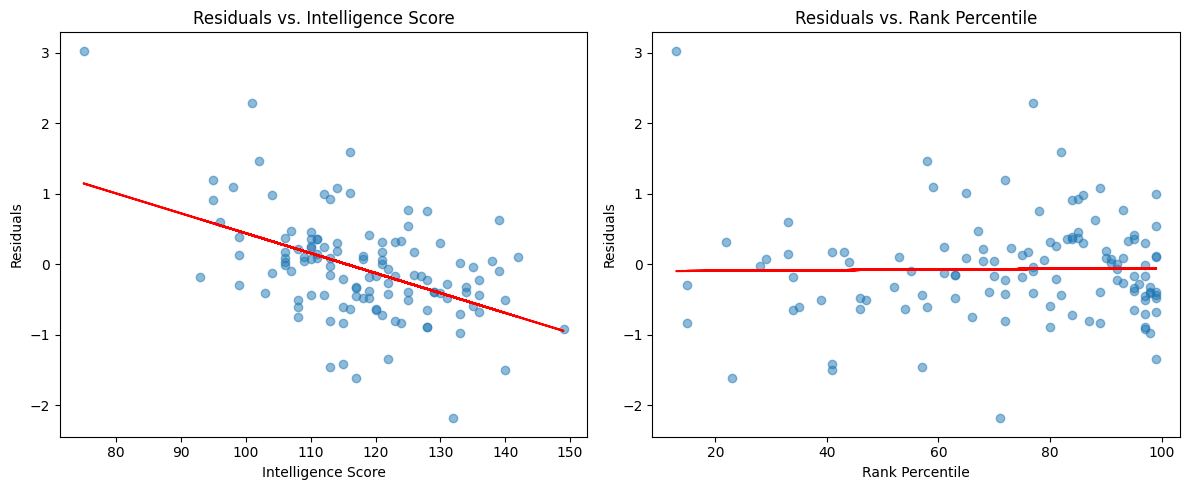

In [50]:
# Scatterplot of residuals against 'INTEL' with regression line
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(CH03PR03['INTEL'], residuals, alpha=0.5)
plt.xlabel('Intelligence Score')
plt.ylabel('Residuals')
plt.title('Residuals vs. Intelligence Score')
regression_line = sm.OLS(residuals, sm.add_constant(CH03PR03['INTEL'])).fit().fittedvalues
plt.plot(CH03PR03['INTEL'], regression_line, color='red')

# Scatterplot of residuals against 'RANK' with regression line
plt.subplot(1, 2, 2)
plt.scatter(CH03PR03['RANK'], residuals, alpha=0.5)
plt.xlabel('Rank Percentile')
plt.ylabel('Residuals')
plt.title('Residuals vs. Rank Percentile')
regression_line = sm.OLS(residuals, sm.add_constant(CH03PR03['RANK'])).fit().fittedvalues
plt.plot(CH03PR03['RANK'], regression_line, color='red')

plt.tight_layout()
plt.show()